In [1]:
import yfinance as yf
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Extraer precios historicos en un rango determinado

apple = yf.download(tickers="AAPL", start="2021-04-06", end="2023-04-06", rounding=True)
apple

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2021-04-06,123.16,124.06,122.62,123.45,80171300
2021-04-07,124.81,124.83,122.12,122.79,83466700
2021-04-08,127.21,127.24,125.42,125.84,88844600
2021-04-09,129.79,129.83,126.34,126.67,106686700
2021-04-12,128.07,129.64,127.48,129.32,91420000
...,...,...,...,...,...
2023-03-30,160.35,160.46,159.27,159.53,49501700
2023-03-31,162.86,162.95,159.90,160.43,68749800


In [3]:
apple= apple['Close']
apple

Ticker,AAPL
Date,
2021-04-06,123.16
2021-04-07,124.81
2021-04-08,127.21
2021-04-09,129.79
2021-04-12,128.07
...,...
2023-03-30,160.35
2023-03-31,162.86
2023-04-03,164.11


In [4]:
apple.index = pd.to_datetime(apple.index)
len_train = int(len(apple) * 0.8)
len_train

404

In [5]:
len_test = int(len(apple) * 0.2)
len_test

101

In [6]:
# Definicion de grupos de prueba y entrenamiento
train = apple[0:len_train]
train

Ticker,AAPL
Date,
2021-04-06,123.16
2021-04-07,124.81
2021-04-08,127.21
2021-04-09,129.79
2021-04-12,128.07
...,...
2022-11-02,142.78
2022-11-03,136.72
2022-11-04,136.46


In [7]:
test = apple[len_train:]
test

Ticker,AAPL
Date,
2022-11-09,132.99
2022-11-10,144.83
2022-11-11,147.62
2022-11-14,146.22
2022-11-15,147.95
...,...
2023-03-30,160.35
2023-03-31,162.86
2023-04-03,164.11


[1.         0.97625375 0.95361587 0.93385774 0.91674083 0.89920409
 0.87971627 0.85896368 0.83914474 0.82179806 0.805351   0.79065514
 0.76990371 0.74987639 0.73088309 0.71190481 0.69503515 0.67680285
 0.65926304 0.64036431 0.61933586 0.59842071 0.57730262 0.55919891
 0.54063525 0.51823989 0.49572249]


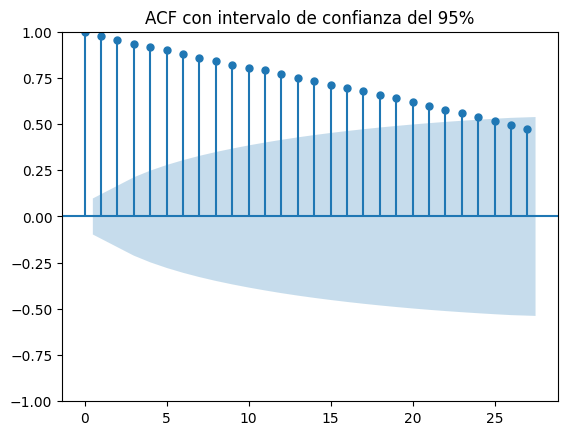

In [8]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

acf_array = acf(train)
print(acf_array)

#Grafico con un nivel del confianza del 95%
plot_acf(train, alpha=0.05)
plt.title("ACF con intervalo de confianza del 95%")
plt.show()

In [9]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# fit an AR(1) model to the first simulated data

mod = ARIMA(train, order=(1, 0, 0))
res= mod.fit()

print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  404
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -991.337
Date:                Sat, 06 Sep 2025   AIC                           1988.674
Time:                        20:05:12   BIC                           2000.678
Sample:                             0   HQIC                          1993.426
                                - 404                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.6379      6.533     22.140      0.000     131.833     157.442
ar.L1          0.9825      0.010    103.256      0.000       0.964       1.001
sigma2         7.8570      0.446     17.613      0.0

In [10]:
predicciones = res.forecast(len(test))
predicciones

404    137.683943
405    137.805715
406    137.925355
407    138.042899
408    138.158386
          ...    
500    143.362373
501    143.384709
502    143.406653
503    143.428213
504    143.449395
Name: predicted_mean, Length: 101, dtype: float64

In [11]:
conf = res.get_forecast(len(test)).conf_int(alpha=0.05)
conf

,lower AAPL,upper AAPL
404,132.190082,143.177803
405,130.103950,145.507480
406,128.574396,147.276314
407,127.338351,148.747448
408,126.292812,150.023960
...,...,...
500,114.359306,172.365440
501,114.364749,172.404669
502,114.370396,172.442910
503,114.376234,172.480192


In [12]:
fcast_res = res.get_forecast(len(test))
print(fcast_res.summary_frame(alpha=0.05))

AAPL        mean    mean_se  mean_ci_lower  mean_ci_upper
404   137.683943   2.803041     132.190082     143.177803
405   137.805715   3.929544     130.103950     145.507480
406   137.925355   4.770985     128.574396     147.276314
407   138.042899   5.461605     127.338351     148.747448
408   138.158386   6.053975     126.292812     150.023960
..           ...        ...            ...            ...
500   143.362373  14.797755     114.359306     172.365440
501   143.384709  14.806374     114.364749     172.404669
502   143.406653  14.814689     114.370396     172.442910
503   143.428213  14.822711     114.376234     172.480192
504   143.449395  14.830450     114.382247     172.516543

[101 rows x 4 columns]


In [13]:
test = pd.DataFrame(test)
predicciones = pd.DataFrame(predicciones)
test = test.reset_index()
predicciones = predicciones.reset_index()

In [14]:
test

Ticker,Date,AAPL
0,2022-11-09,132.99
1,2022-11-10,144.83
2,2022-11-11,147.62
3,2022-11-14,146.22
4,2022-11-15,147.95
...,...,...
96,2023-03-30,160.35
97,2023-03-31,162.86
98,2023-04-03,164.11
99,2023-04-04,163.58


In [15]:
predicciones

,index,predicted_mean
0,404,137.683943
1,405,137.805715
2,406,137.925355
3,407,138.042899
4,408,138.158386
...,...,...
96,500,143.362373
97,501,143.384709
98,502,143.406653
99,503,143.428213


In [16]:
# calcular nivel de error al comparar predicciones vs real

import numpy as np

acumulador1 = 0
acumulador2 = 0

for contador in range(0, 101):
    acumulador1 = acumulador1 + (test.iloc[contador][1] - predicciones.iloc[contador][1])**2
    acumulador2 = acumulador2 + np.abs(test.iloc[contador][1] - predicciones.iloc[contador][1]) / test.iloc[contador][1]

mse = acumulador1 / 101
rmse = np.round(np.sqrt(mse), 2)
mape = np.round((acumulador2 / 101) * 100, 2)
print("El RMSE es: ", rmse)
print("El MAPE es: ", mape, "%")

El RMSE es:  9.58
El MAPE es:  5.69 %


In [17]:
# Pronostico de los siguientes 5 periodos posteriores al ultimo dato historico
predicciones = res.forecast(len(test) + 5)
predicciones.tail(5)

505    143.470207
506    143.490654
507    143.510743
508    143.530480
509    143.549872
Name: predicted_mean, dtype: float64

In [18]:
conf = res.get_forecast(len(test) + 5).conf_int(alpha=0.05)
conf.tail(5)

,lower AAPL,upper AAPL
505,114.388424,172.551989
506,114.394752,172.586556
507,114.401218,172.620268
508,114.407812,172.653149
509,114.414521,172.685222


In [19]:
train = pd.DataFrame(train)
lista = test['Date']
lista = pd.DataFrame(lista)
test.index = test['Date']
test.drop(columns=['Date'], inplace=True)
test

Ticker,AAPL
Date,
2022-11-09,132.99
2022-11-10,144.83
2022-11-11,147.62
2022-11-14,146.22
2022-11-15,147.95
...,...
2023-03-30,160.35
2023-03-31,162.86
2023-04-03,164.11


In [20]:
k = 5
lista2 = []
for day in range(1,6):
        fecha = ((pd.to_datetime('2023-04-05')+pd.offsets.BDay(day)).date())
        lista2.append(fecha)
lista2 = pd.DataFrame(lista2, columns=['Date'])
lista2['Date'] = pd.to_datetime(lista2['Date'])
lista2

,Date
0,2023-04-06
1,2023-04-07
2,2023-04-10
3,2023-04-11
4,2023-04-12


In [21]:
fechas = pd.concat([lista, lista2])
fechas = fechas.reset_index()
fechas

,index,Date
0,0,2022-11-09
1,1,2022-11-10
2,2,2022-11-11
3,3,2022-11-14
4,4,2022-11-15
...,...,...
101,0,2023-04-06
102,1,2023-04-07
103,2,2023-04-10
104,3,2023-04-11


In [22]:
fechas.drop(columns=['index'], inplace=True)
fechas

,Date
0,2022-11-09
1,2022-11-10
2,2022-11-11
3,2022-11-14
4,2022-11-15
...,...
101,2023-04-06
102,2023-04-07
103,2023-04-10
104,2023-04-11


In [23]:
predicciones = pd.DataFrame(predicciones)
predicciones.drop(columns=['index'], inplace=True)
predicciones

KeyError: "['index'] not found in axis"

In [ ]:
frames = [fechas, predicciones]
resultado = pd.concat(frames, axis=1, join='inner')
resultado.columns = ['Date','predicciones']
resultado

,Date,predicciones
0,2022-11-09,137.683943
1,2022-11-10,137.805715
2,2022-11-11,137.925355
3,2022-11-14,138.042900
4,2022-11-15,138.158386
...,...,...
101,2023-04-06,143.470205
102,2023-04-07,143.490652
103,2023-04-10,143.510741
104,2023-04-11,143.530478


In [ ]:
print(resultado.dtypes)

Date            datetime64[ns]
predicciones           float64
dtype: object


In [ ]:
resultado.index = resultado['Date']
resultado.drop(columns=['Date'], inplace=True)
resultado

,predicciones
Date,
2022-11-09,137.683943
2022-11-10,137.805715
2022-11-11,137.925355
2022-11-14,138.042900
2022-11-15,138.158386
...,...
2023-04-06,143.470205
2023-04-07,143.490652
2023-04-10,143.510741


In [ ]:
conf = conf.reset_index()
conf.drop(columns=['index'], inplace=True)
conf

,lower AAPL,upper AAPL
0,132.190080,143.177805
1,130.103947,145.507483
2,128.574393,147.276317
3,127.338348,148.747451
4,126.292809,150.023963
...,...,...
101,114.388435,172.551976
102,114.394762,172.586542
103,114.401228,172.620254
104,114.407822,172.653135


In [ ]:
frames = [fechas, conf]
intervalos = pd.concat(frames, axis=1, join='inner')
intervalos

,Date,lower AAPL,upper AAPL
0,2022-11-09,132.190080,143.177805
1,2022-11-10,130.103947,145.507483
2,2022-11-11,128.574393,147.276317
3,2022-11-14,127.338348,148.747451
4,2022-11-15,126.292809,150.023963
...,...,...,...
101,2023-04-06,114.388435,172.551976
102,2023-04-07,114.394762,172.586542
103,2023-04-10,114.401228,172.620254
104,2023-04-11,114.407822,172.653135


In [ ]:
intervalos.index = intervalos['Date']
intervalos.drop(columns=['Date'], inplace=True)
intervalos

,lower AAPL,upper AAPL
Date,,
2022-11-09,132.190080,143.177805
2022-11-10,130.103947,145.507483
2022-11-11,128.574393,147.276317
2022-11-14,127.338348,148.747451
2022-11-15,126.292809,150.023963
...,...,...
2023-04-06,114.388435,172.551976
2023-04-07,114.394762,172.586542
2023-04-10,114.401228,172.620254


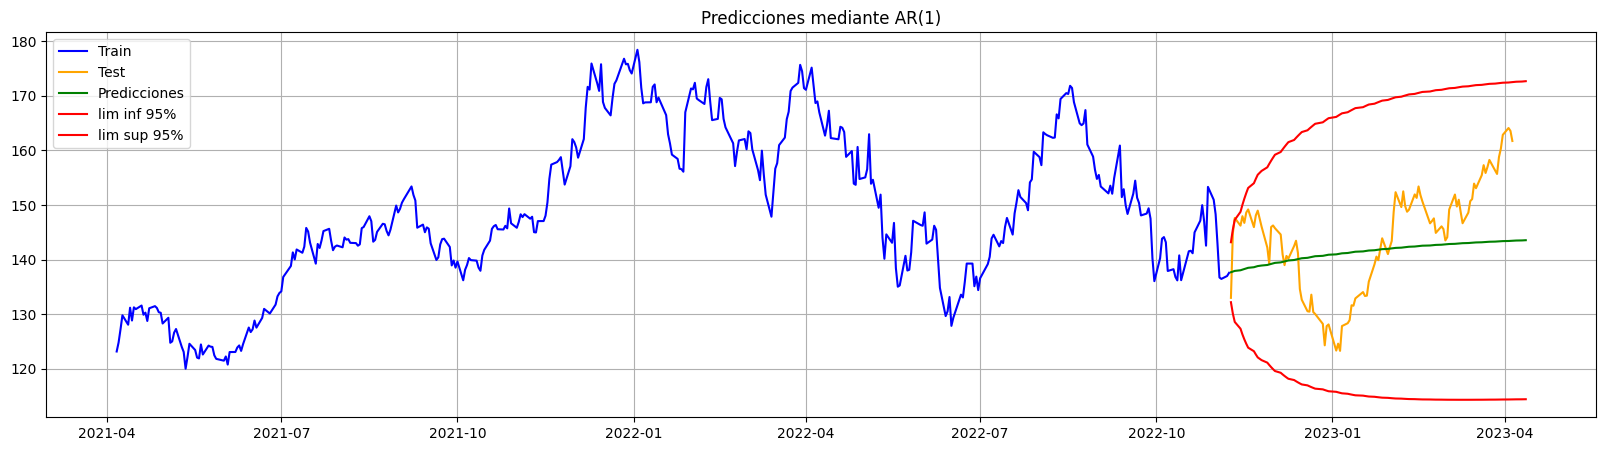

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Test', color='orange')
plt.plot(resultado, label='Predicciones', color='green')  # ✅ Cambio 1
plt.plot(intervalos.index, intervalos['lower AAPL'], label='lim inf 95%', color='red')  # ✅ Cambio 2
plt.plot(intervalos.index, intervalos['upper AAPL'], label='lim sup 95%', color='red')  # ✅ Cambio 3
plt.legend(loc='best')
plt.title('Predicciones mediante AR(1)')
plt.show()

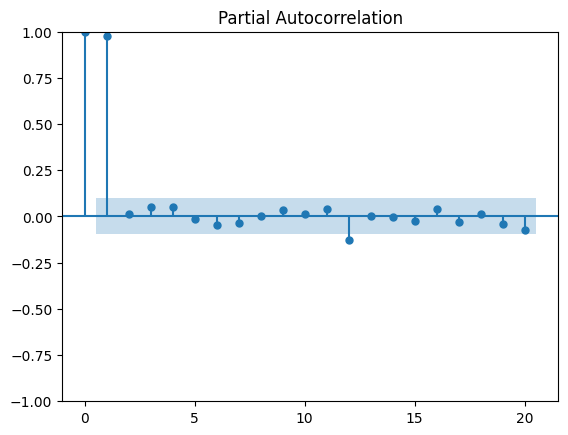

In [ ]:
# Determinacion del valor adecuado de p para AR(p) a partir de la funcion ACF (autocorrelacion parcial)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train, lags=20)
plt.show() 

## Conclusion: el modelo AR(1) parecer ser el mas adecuado 

C:\Users\benma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

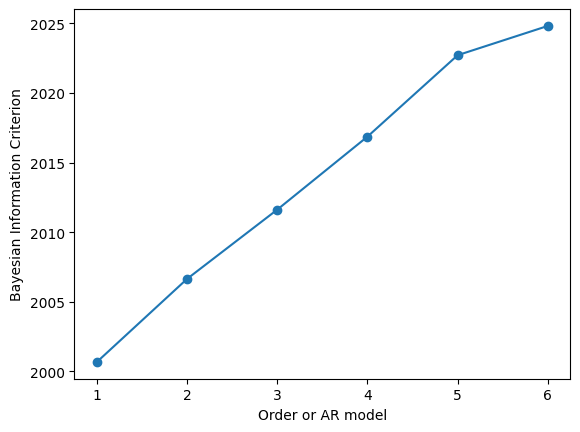

In [ ]:
# Determinacion del valor adecuado de p para AR(p) a partir del criterio de informacion Bayesiano
# Fit the data to an AR(p) for p = 0,....,6 and save the BIC

AIC= np.zeros(7)
for p in range(7):
    mod = ARIMA(train, order=(p, 0, 0))
    res= mod.fit()
# Save BIC for AR(p)
    AIC[p] = res.bic

# plot the BIC as a function of p

plt.plot(range(1,7), AIC[1:7], marker='o')
plt.xlabel('Order or AR model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

C:\Users\benma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

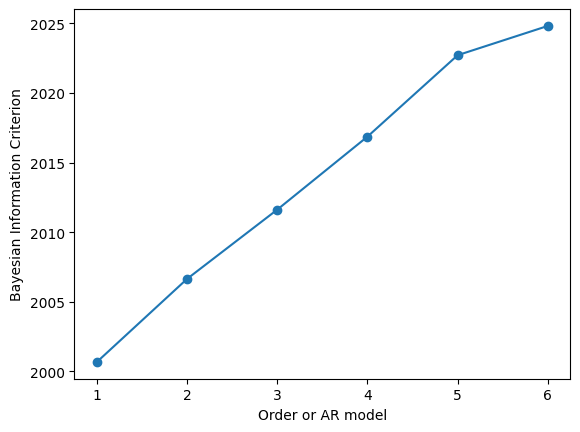

In [ ]:
# Determinacion del valor adecuado de p para AR(p) a partir del criterio de informacion Bayesiano
# Fit the data to an AR(p) for p = 0,....,6 and save the BIC

BIC= np.zeros(7)
for p in range(7):
    mod = ARIMA(train, order=(p, 0, 0))
    res= mod.fit()
# Save BIC for AR(p)
    BIC[p] = res.bic

# plot the BIC as a function of p

plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order or AR model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

### Conclusion: en ambos indices se tiene el menor valor para p=1. se recomienda utilizar AR(1)